# Mounting

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Training

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
resnet_base = ResNet152V2(
    include_top=False,
    input_shape=(64, 64, 3)
)
resnet_base.trainable = False

234545216/234545216 [==============================] - 2s 0us/step


In [42]:
model = Sequential([
  resnet_base,
  Flatten(),
  Dense(4096, activation='relu'),
  Dense(2148, activation='relu'),
  Dropout(0.25),
  Dense(2148, activation='relu'),
  Dense(1024, activation='relu'),
  Dropout(0.25),
  Dense(512, activation='relu'),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(units=49, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2, 2, 2048)        58331648  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_26 (Dense)            (None, 4096)              33558528  
                                                                 
 dense_27 (Dense)            (None, 2148)              8800356   
                                                                 
 dropout_11 (Dropout)        (None, 2148)              0         
                                                                 
 dense_28 (Dense)            (None, 2148)              4616052   
                                                                 
 dense_29 (Dense)            (None, 1024)             

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'/content/gdrive/MyDrive/Monument Classifier/datasets/train',
                                                  target_size = (64, 64),
                                                  batch_size = 256,
                                                  class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/gdrive/MyDrive/Monument Classifier/datasets/test',
                                              target_size = (64, 64),
                                                batch_size = 256,
                                                class_mode = 'categorical')

Found 1925 images belonging to 49 classes.
Found 623 images belonging to 49 classes.


In [7]:
if(training_set):
  print("Training set available", training_set)

if(test_set):
  print("Test set available", test_set)

Training set available <keras.src.preprocessing.image.DirectoryIterator object at 0x7afc3ece62c0>
Test set available <keras.src.preprocessing.image.DirectoryIterator object at 0x7afc3ece4f70>


In [44]:
history = model.fit(training_set, validation_data=test_set, epochs=100, callbacks=[EarlyStopping(monitor='accuracy', patience=3)])

Epoch 1/100
8/8 [==============================] - 9s 1s/step - loss: 1.0449 - accuracy: 0.7314 - val_loss: 1.5133 - val_accuracy: 0.6356
Epoch 2/100
8/8 [==============================] - 7s 926ms/step - loss: 1.0071 - accuracy: 0.7455 - val_loss: 1.4625 - val_accuracy: 0.6597
Epoch 3/100
8/8 [==============================] - 8s 1s/step - loss: 1.0519 - accuracy: 0.7397 - val_loss: 1.4495 - val_accuracy: 0.6501
Epoch 4/100
8/8 [==============================] - 7s 909ms/step - loss: 0.9081 - accuracy: 0.7683 - val_loss: 1.4112 - val_accuracy: 0.6774
Epoch 5/100
8/8 [==============================] - 8s 979ms/step - loss: 0.9202 - accuracy: 0.7855 - val_loss: 1.4379 - val_accuracy: 0.6742
Epoch 6/100
8/8 [==============================] - 8s 1s/step - loss: 0.8234 - accuracy: 0.8000 - val_loss: 1.3160 - val_accuracy: 0.6934
Epoch 7/100
8/8 [==============================] - 7s 925ms/step - loss: 0.7979 - accuracy: 0.7953 - val_loss: 1.3582 - val_accuracy: 0.6677
Epoch 8/100
8/8 [=====

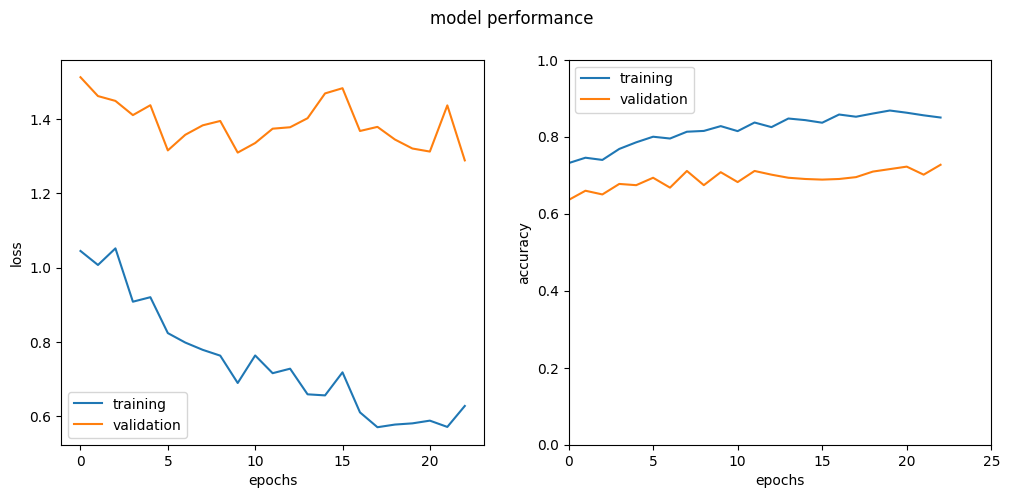

In [52]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plt.xlim([0, 25])
plt.ylim([0, 1])
fig.suptitle('model performance')

ax1.plot(history.history['loss'], label='training')
ax1.plot(history.history['val_loss'], label='validation')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='training')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

fig.show()

In [53]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction

In [56]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


model = load_model("/content/model.h5")

In [72]:
sample = image.load_img("/content/gdrive/MyDrive/Monument Classifier/datasets/train/Aga Khan Palace/Aga Khan Palace24.jpg")
x = image.img_to_array(sample)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
pred = model.predict(images)

1/1 [==============================] - 0s 38ms/step


In [73]:
np.argmax(pred)

18